In [34]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

pd.pandas.set_option("display.max_columns", None)

In [35]:
data = pd.read_csv("houseprice.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [37]:
print(f"Number of House ID labels: {len(data.Id.unique())}")
print(f"Number of houses in the dataset: {len(data)}")

Number of House ID labels: 1460
Number of houses in the dataset: 1460


In [38]:
categorical = [var for var in data.columns if data[var].dtype=="O"]

print(f"There are {len(categorical)} categorical variables")

There are 43 categorical variables


In [39]:
data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
numerical = [var for var in data.columns if data[var].dtype!="O"]

year_vars = [var for var in numerical if "Yr" in var or "Year" in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [41]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0, 0.5, 'mean House price')

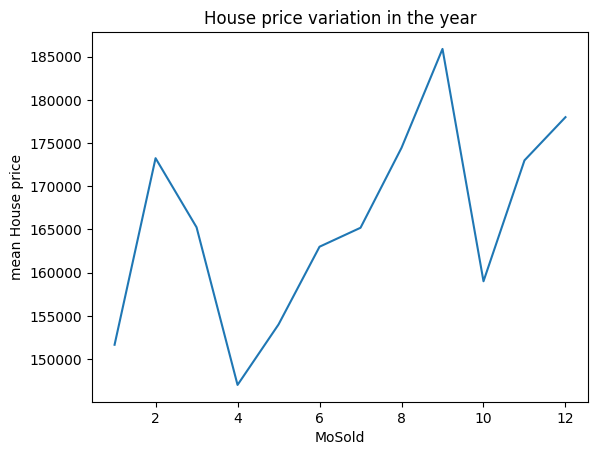

In [42]:
data.groupby("MoSold")["SalePrice"].median().plot()
plt.title("House price variation in the year")
plt.ylabel("mean House price")

In [43]:
discrete = []

for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        print(var, "values: ", data[var].unique())
        discrete.append(var)
print()
print(f"There are {len(discrete)} discrete variables")

MSSubClass values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath values:  [1 0 2 3]
BsmtHalfBath values:  [0 1 2]
FullBath values:  [2 1 3 0]
HalfBath values:  [1 0 2]
BedroomAbvGr values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr values:  [1 2 3 0]
TotRmsAbvGrd values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values:  [0 1 2 3]
GarageCars values:  [2 3 1 0 4]
PoolArea values:  [  0 512 648 576 555 480 519 738]
MoSold values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


In [44]:
numerical = [var for var in numerical if var not in discrete and var not in ["Id", "SalePrice"] and var not in year_vars]

print(f"There are {len(numerical)} numerical and continuous variables.")

There are 18 numerical and continuous variables.


In [45]:
# Percentage of missing data

for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.5972602739726027
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


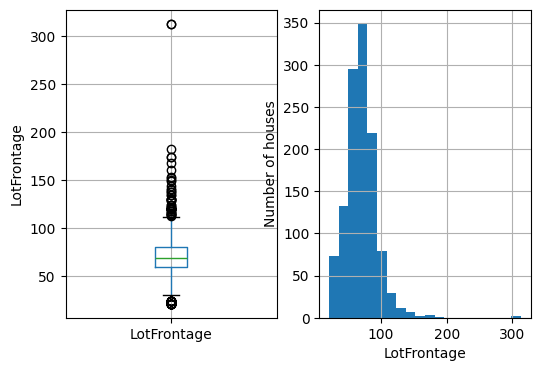

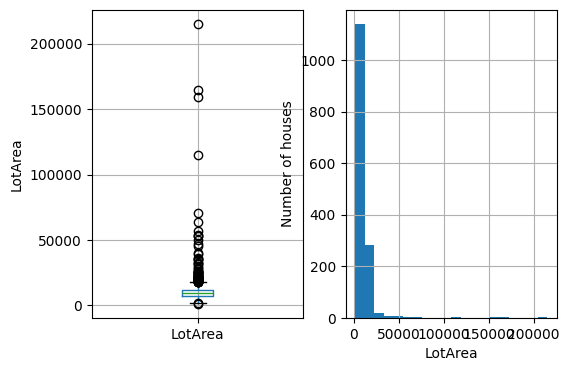

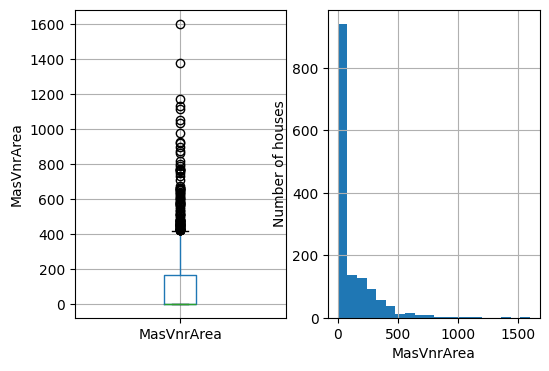

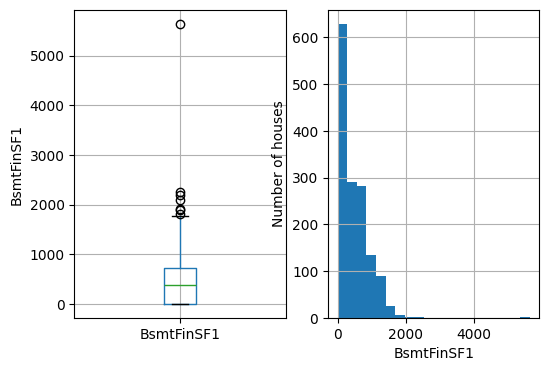

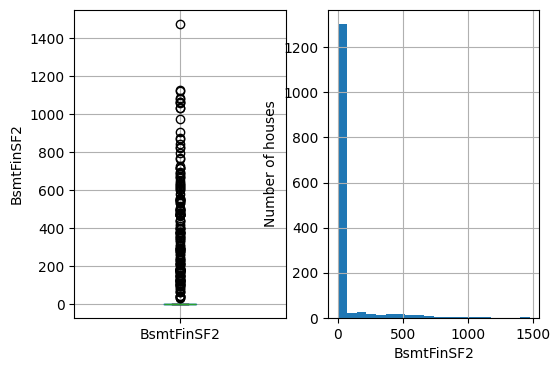

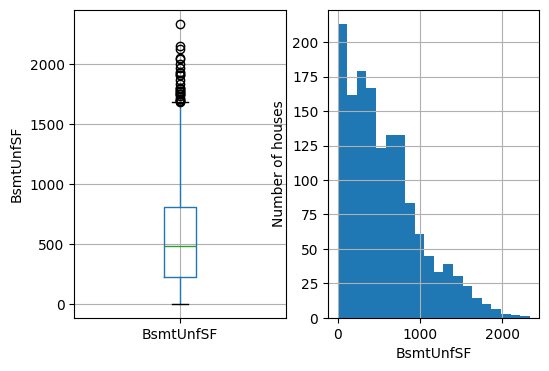

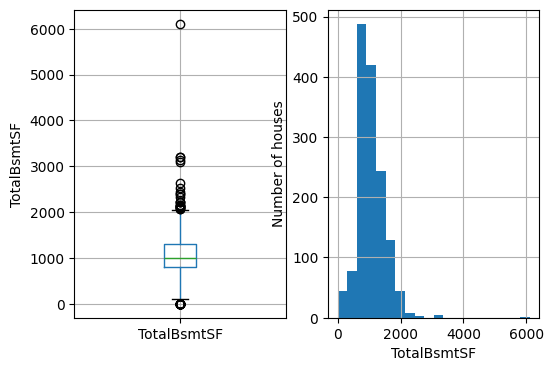

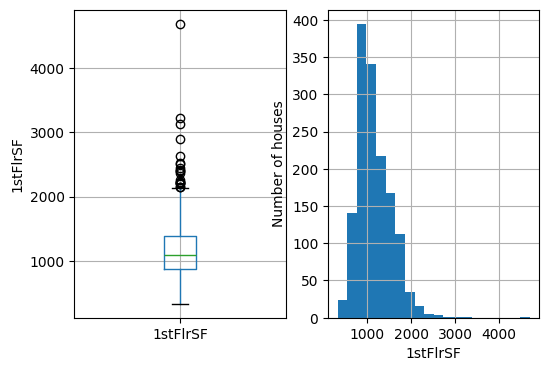

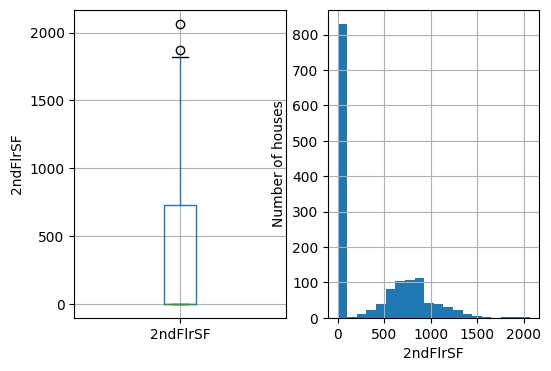

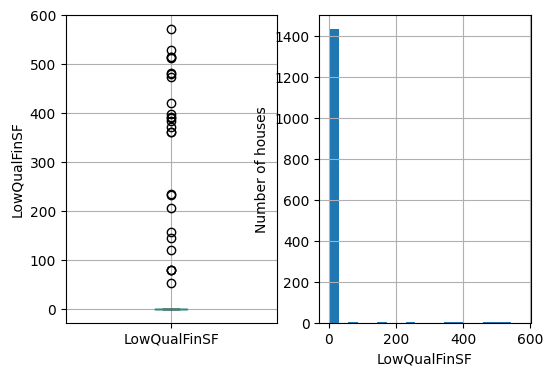

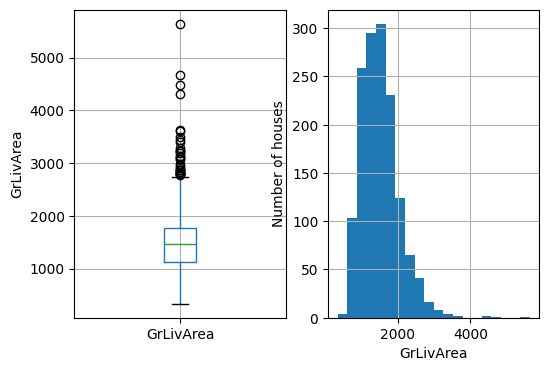

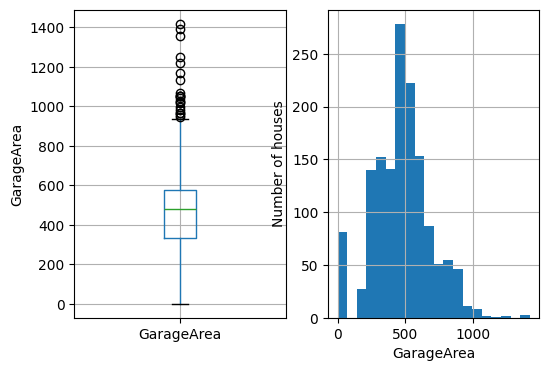

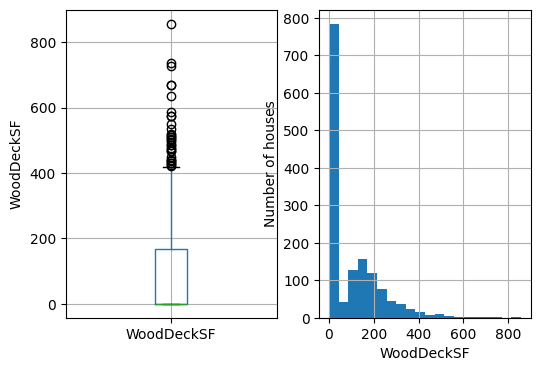

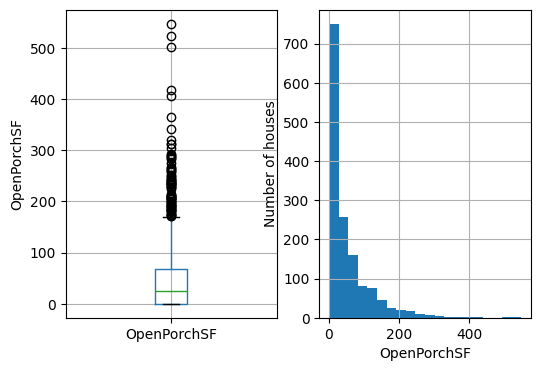

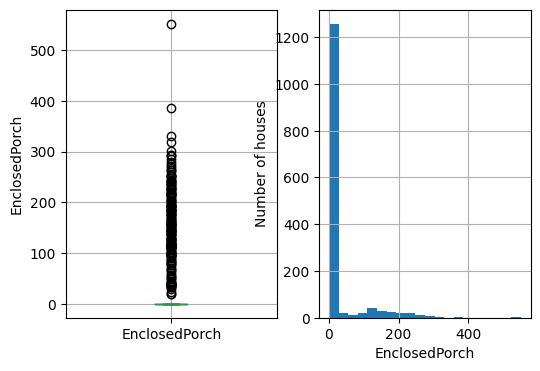

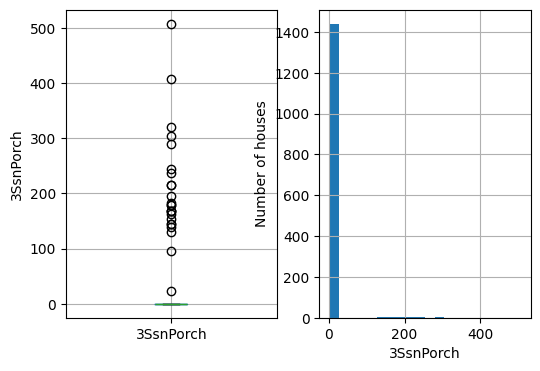

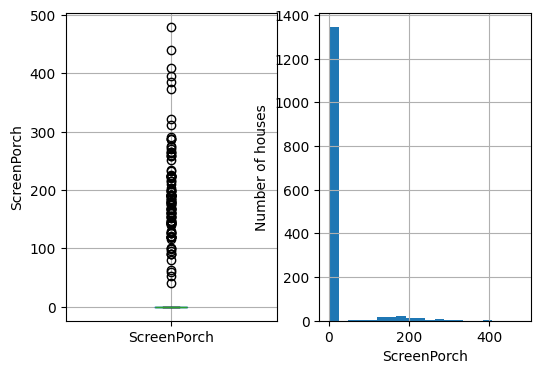

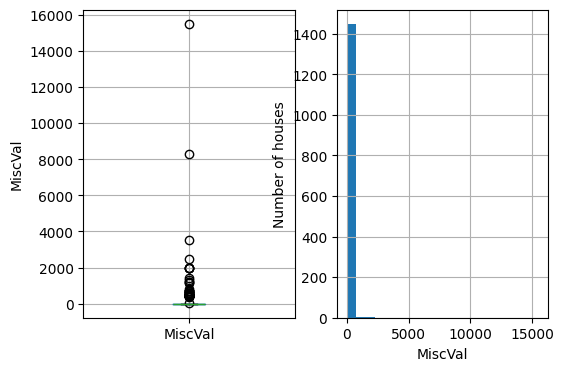

In [46]:
for var in numerical:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

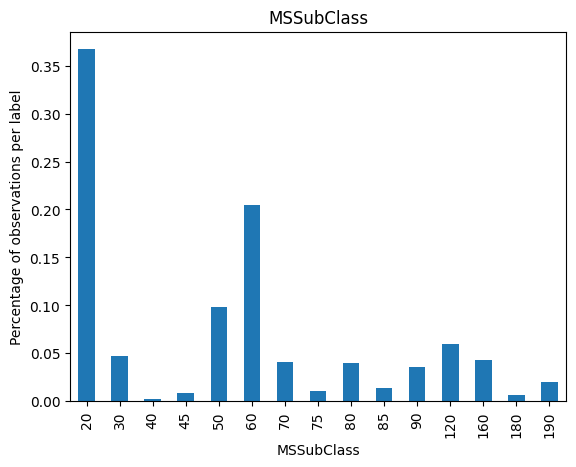

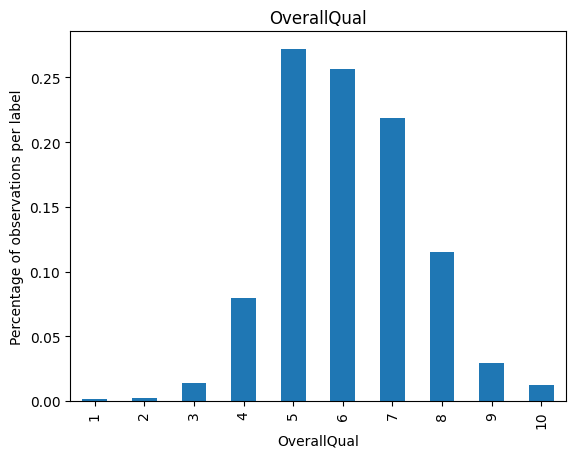

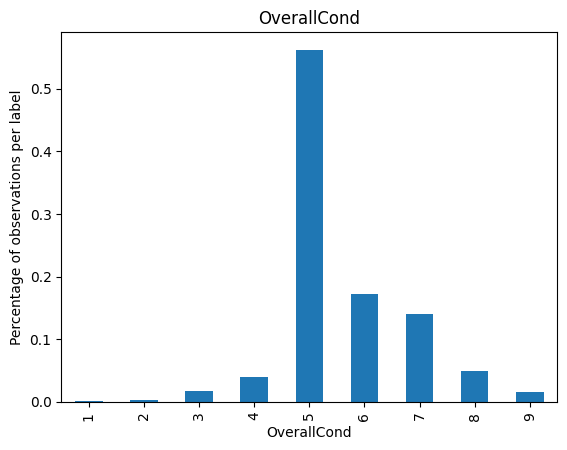

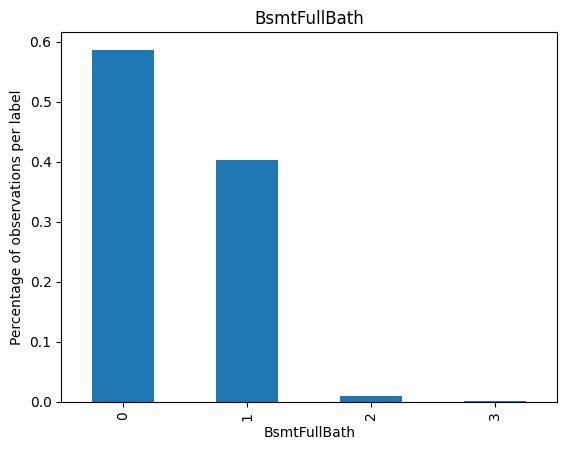

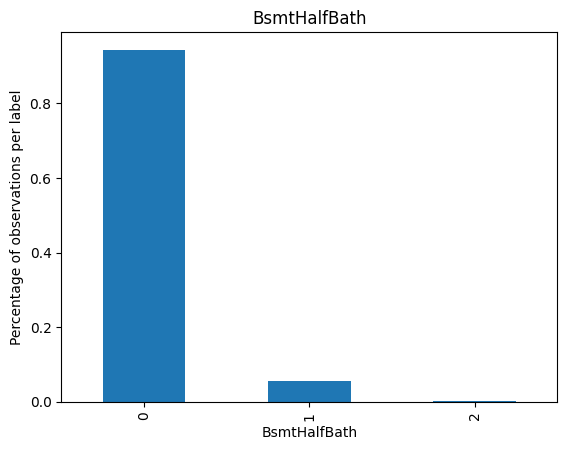

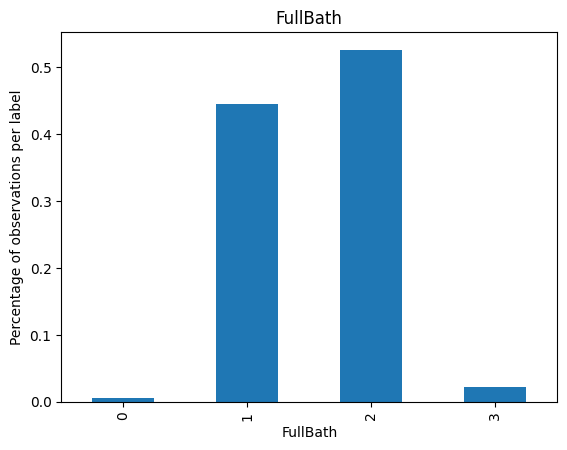

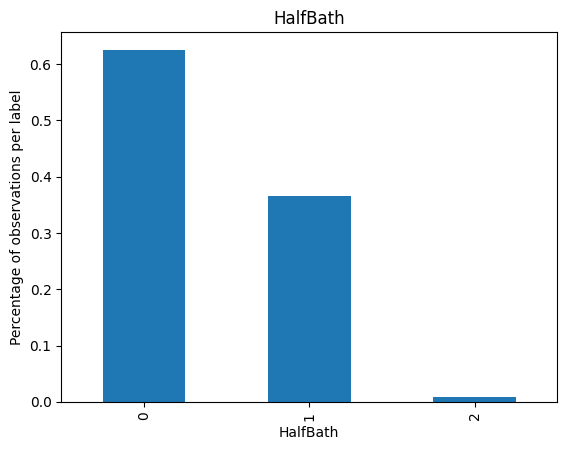

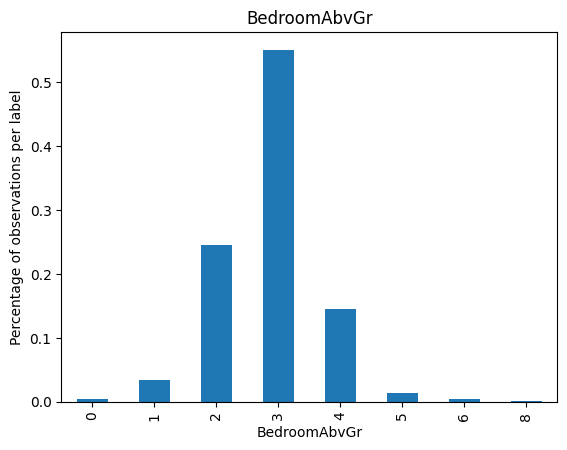

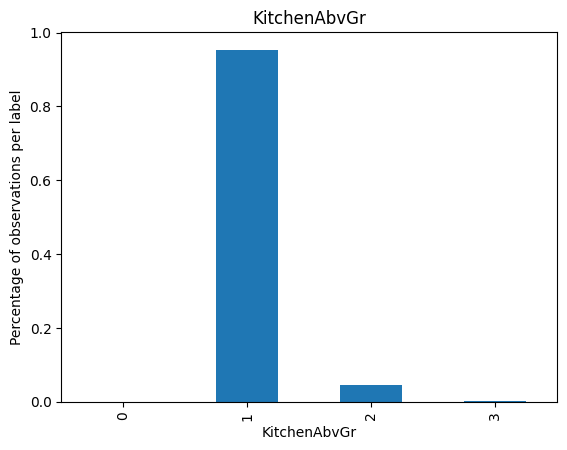

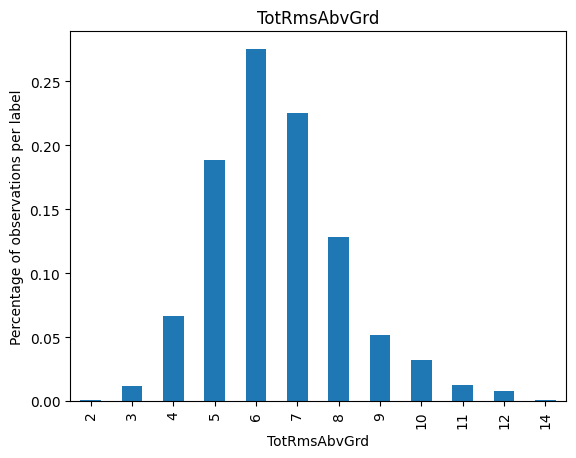

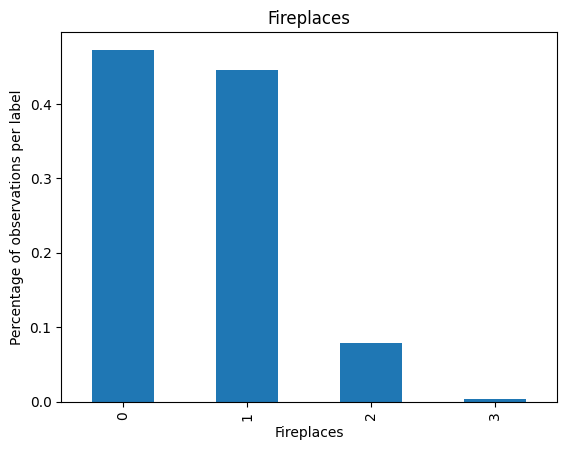

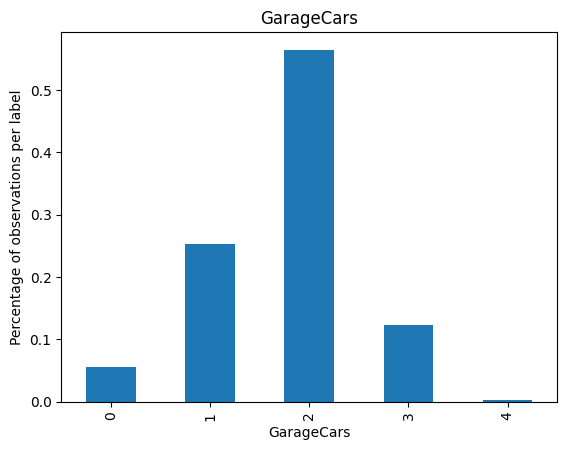

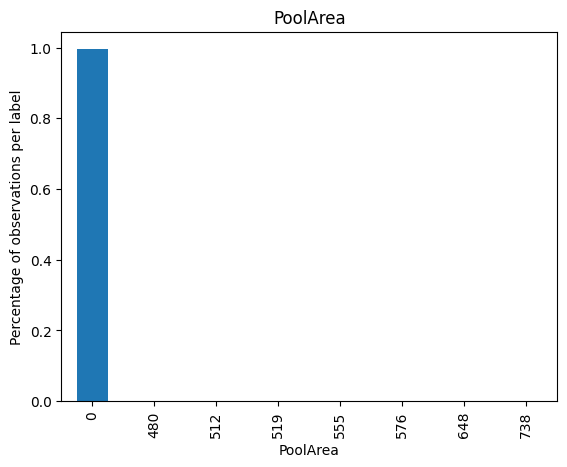

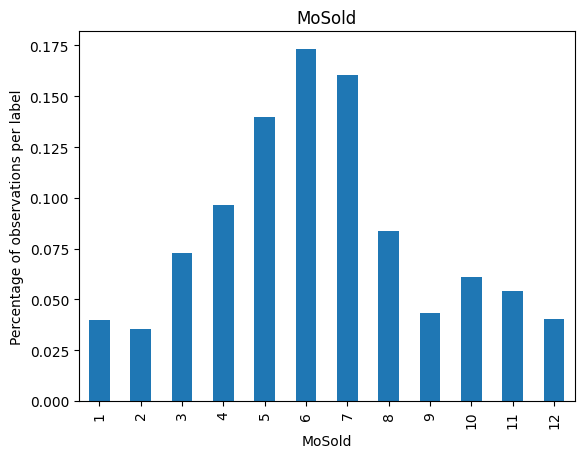

In [47]:
# outlies in discrete variables

for var in discrete:
    (data.groupby(var)[var].count() / len(data)).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

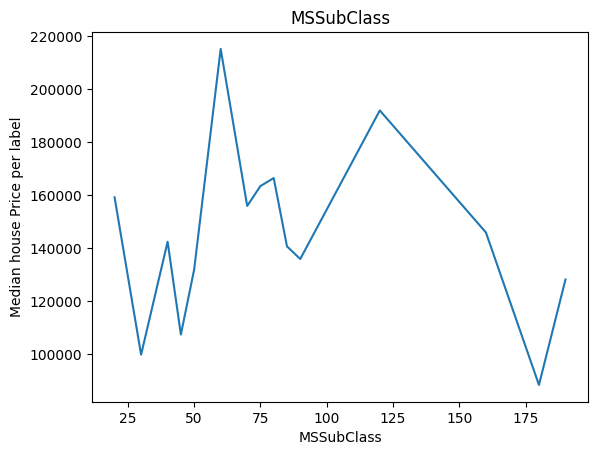

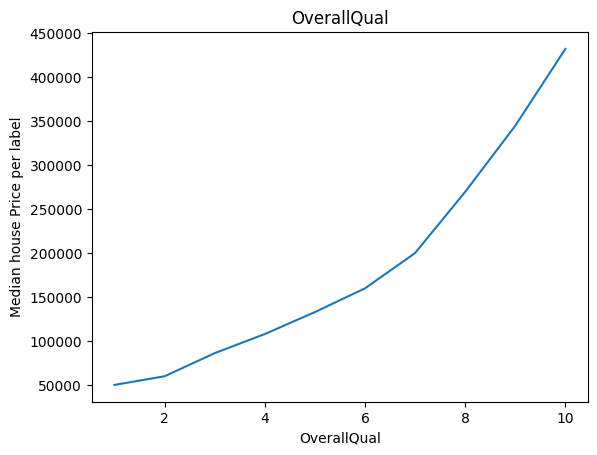

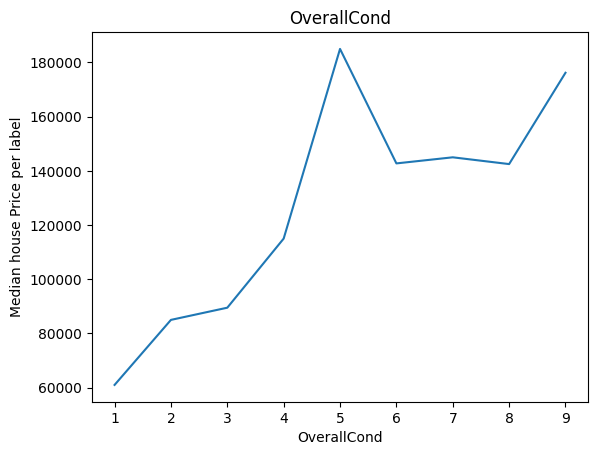

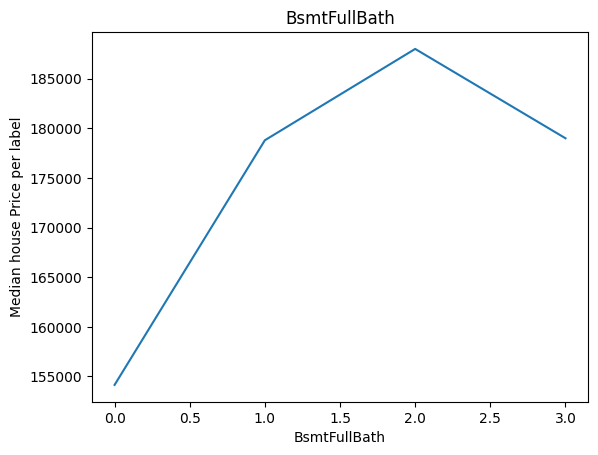

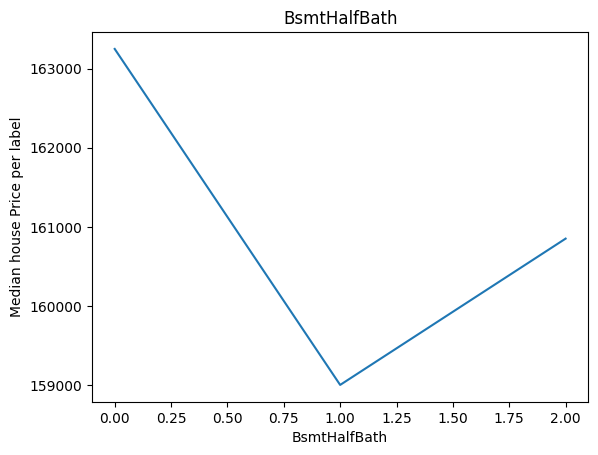

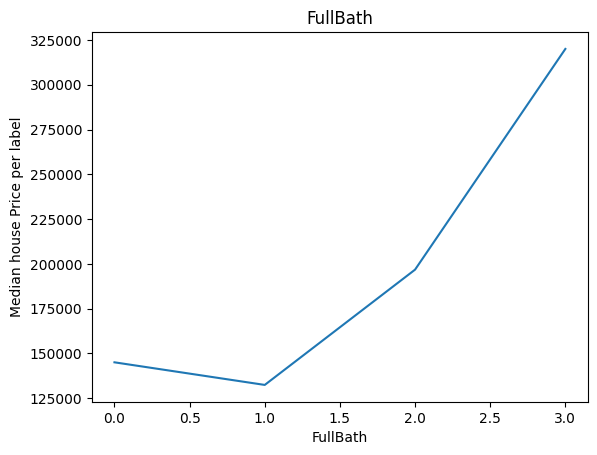

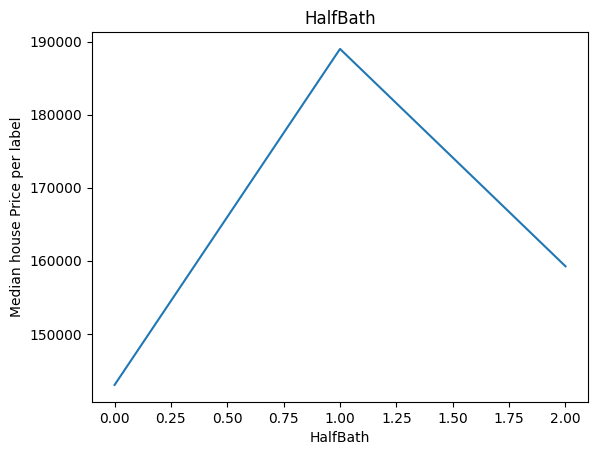

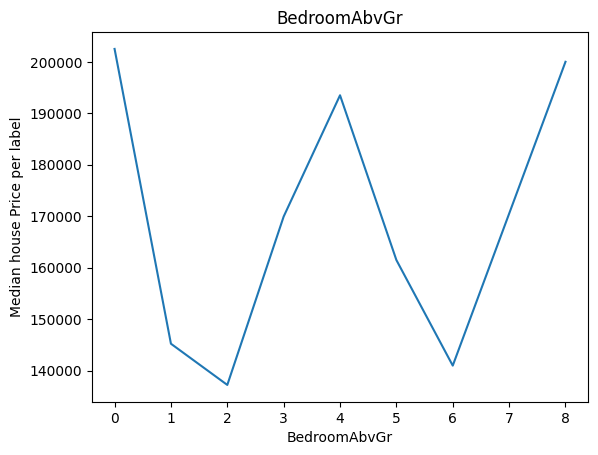

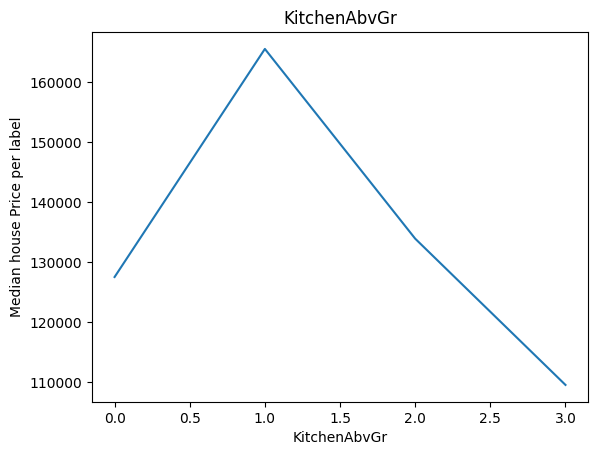

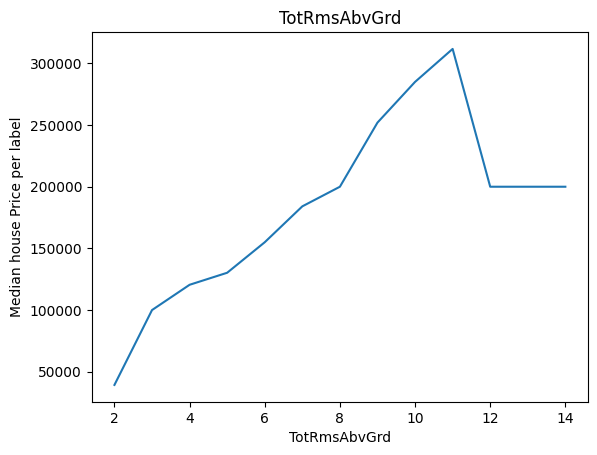

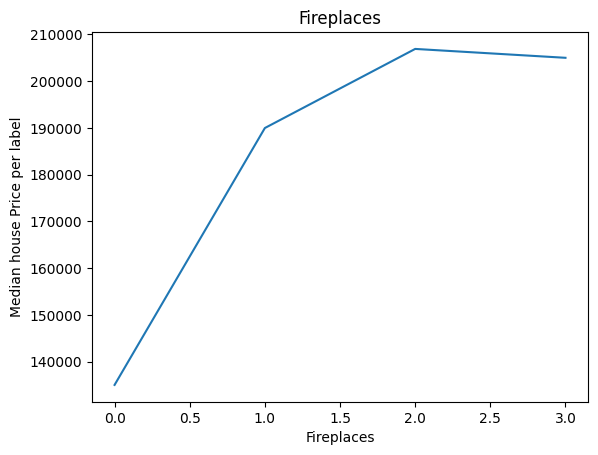

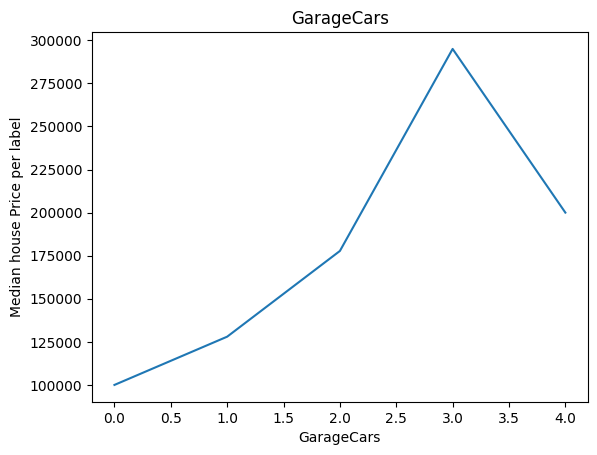

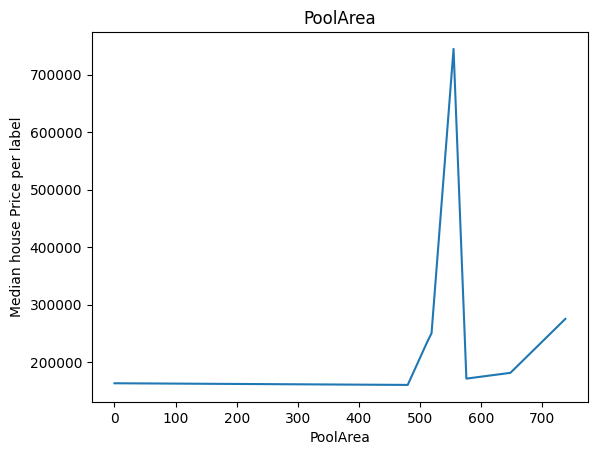

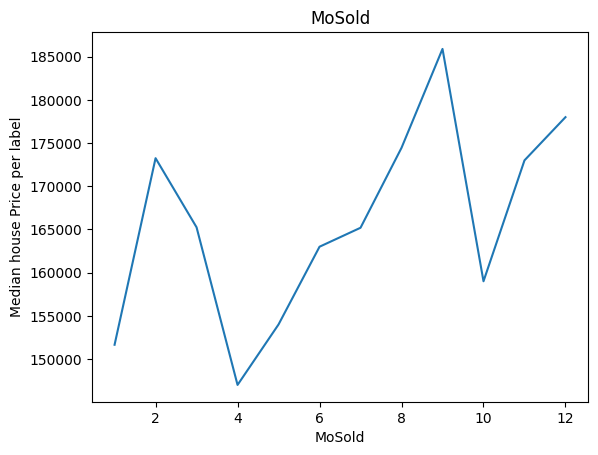

In [48]:
# let's plot the median sale price per value of the discrete
# variable

for var in discrete:
    data.groupby(var)['SalePrice'].median().plot()
    plt.ylabel('Median house Price per label')
    plt.title(var)
    plt.show()

Text(0, 0.5, 'Number of different categories')

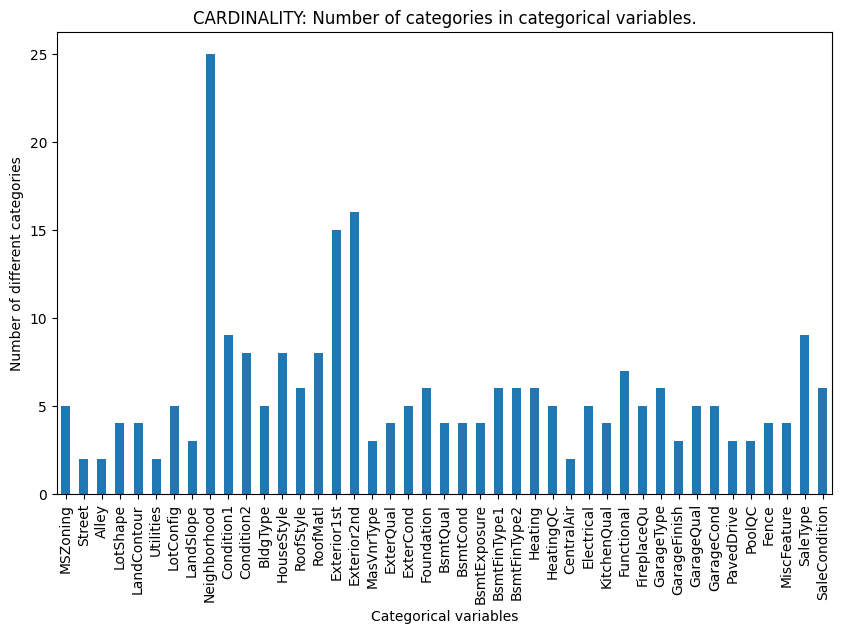

In [49]:
data[categorical].nunique().plot.bar(figsize=(10, 6))
plt.title("CARDINALITY: Number of categories in categorical variables.")
plt.xlabel("Categorical variables")
plt.ylabel("Number of different categories")

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["Id", "SalePrice"], axis=1),
    data["SalePrice"],
    test_size=0.1,
    random_state=0
)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

In [51]:
def elapsed_years(df, var):
    df[var] = df["YrSold"] - df[var]
    return df

for var in ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

X_train[["YearBuilt", "YearRemodAdd", "GarageYrBlt"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [52]:
X_train.drop("YrSold", axis=1, inplace=True)
X_test.drop("YrSold", axis=1, inplace=True)

final_columns = X_train.columns

In [53]:
year_vars.remove("YrSold")

for col in numerical+year_vars:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


In [54]:
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.6012176560121766
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


In [55]:
X_train[discrete] = X_train[discrete].astype("O")
X_test[discrete] = X_test[discrete].astype("O")

X_train.shape

(1314, 78)

In [56]:
from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser

house_pipe = Pipeline([

    # Missing data imputation
    ("missing_ind", AddMissingIndicator(variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"])),
    ("imputer_num", MeanMedianImputer(imputation_method="median", variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"])),
    ("imputer_cat", CategoricalImputer(variables=categorical)),

    # Categorical encoding
    ("rare_label_enc", RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical+discrete)),
    ("categorical_enc", OrdinalEncoder(encoding_method="ordered", variables=categorical+discrete)),

    # Discretization + encoding
    ("discretisation", EqualFrequencyDiscretiser(q=5, return_object=True, variables=numerical)),
    ("encoding", OrdinalEncoder(encoding_method="ordered", variables=numerical)),


    # Feature scaling
    ("scaler", StandardScaler()),

    # Regression
    ("lasso", Lasso(random_state=0))

])

In [57]:
house_pipe.fit(X_train, y_train)

X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

X_train_preds

array([236374.72216906, 158270.52497462, 293768.34381224, ...,
       104320.87752108, 208275.38709871, 227190.99658434])

In [58]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 1045661395.9613965
train rmse: 32336.68807966265
train r2: 0.8325288994593113

test mse: 2109298249.3568382
test rmse: 45927.09711441425
test r2: 0.6930641932834741


c:\Users\veace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\veace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


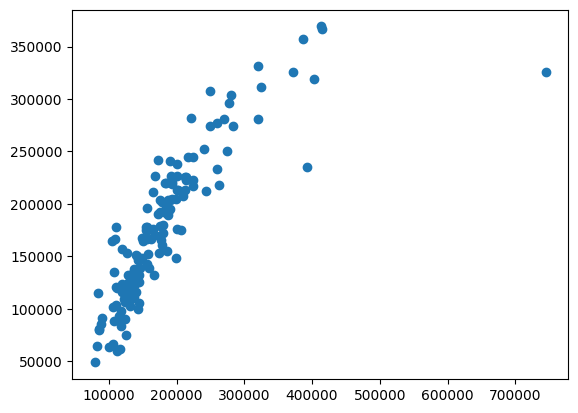

In [59]:
plt.scatter(y_test, X_test_preds)

<Axes: >

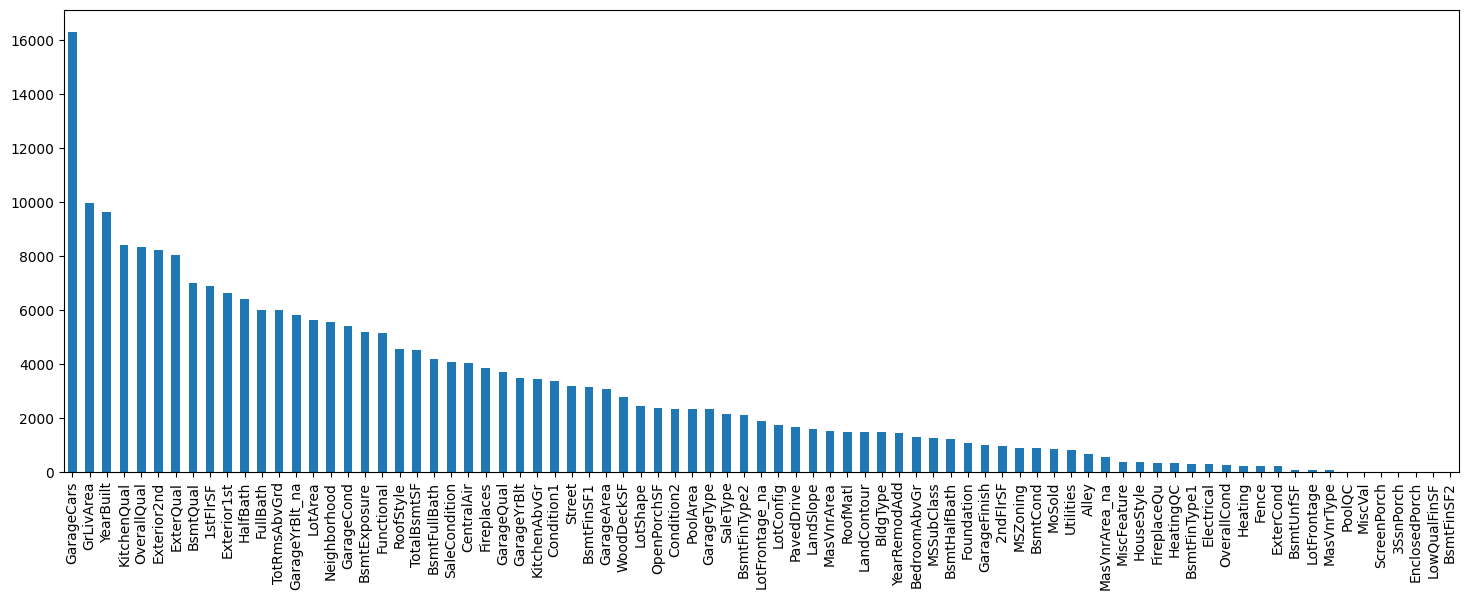

In [60]:
importance = pd.Series(np.abs(house_pipe.named_steps["lasso"].coef_))
importance.index = list(final_columns) + ["LotFrontage_na", "MasVnrArea_na", "GarageYrBlt_na"]
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18, 6))